# 비지도 학습

타깃이 없을 때 사용하는 머신러닝 알고리즘이다. 외부의 도움 없이 스스로 유용한 무언가를 학습해야한다. 군집, 차원 축소 등이 있다.


# 군집

비슷한 샘플끼리 하나의 그룹으로 모으는 비지도 학습이다. 하나의 샘플 그룹을 클러스터라고 한다.

---

과일 사진을 과일 종류대로 모으는 군집 알고리즘을 구해보자

In [ ]:
### 데이터 준비

# '!' 문자: 파이썬 코드가 아닌 리눅스 셸 명령을 실행한다
# wget 명령: 원격 주소에서 데이터를 다운로드하여 저장한다

!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2024-08-23 12:58:50--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-08-23 12:58:50--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-08-23 12:58:51--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

In [ ]:
# load(파일 이름) 함수: 파일을 로드한다

import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')
fruits.shape   #(샘플의 개수, 이미지 세로, 이미지 가로)

(300, 100, 100)

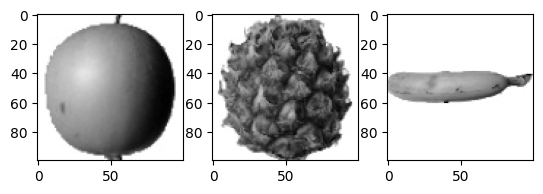

In [ ]:
## subplots(행,열) 함수: Figure 객체, (행,열) 크기의 Axes 객체를 반환한다

# imshow() 메서드: 넘파이 배열로 저장된 이미지를 그린다
# cmap 매개변수: 컬러맵을 지정한다

fig, axs = plt.subplots(1,3)
axs[0].imshow(fruits[0], cmap='gray_r')
axs[1].imshow(fruits[100], cmap='gray_r')
axs[2].imshow(fruits[200], cmap='gray_r')
plt.show()

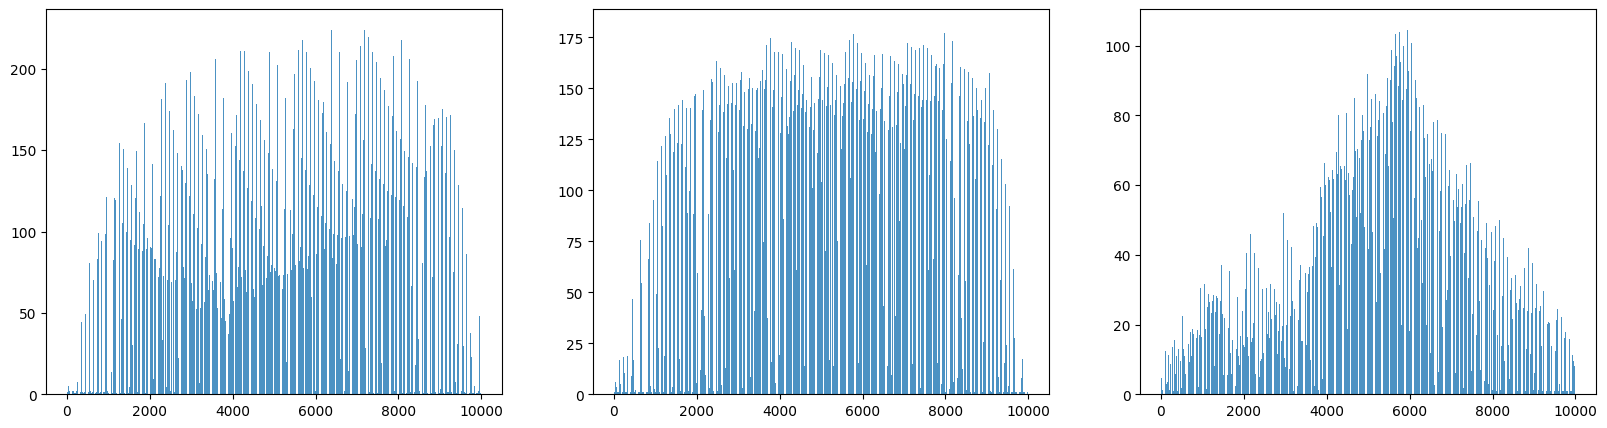

In [ ]:
### 데이터 분석하기

## 100*100 크기의 데이터의 픽셀 평균값 막대 그래프

# reshape(배열의 크기) 메서드: 원소의 개수를 유지하여 배열의 크기를 바꾼다
# mean() 함수: 평균을 계산한다
# axis 매개변수: 0이면 행을 따라 계산->열의 평균값, 1이면 열을 따라 계산->행의 평균값

apple = fruits[0:100].reshape(100, 100*100)
pineapple = fruits[100:200].reshape(100, 100*100)
banana = fruits[200:300].reshape(100, 100*100)

fig, axs = plt.subplots(1, 3, figsize=(20,5))

axs[0].bar(range(10000), np.mean(apple, axis=0), alpha=0.8)
axs[1].bar(range(10000), np.mean(pineapple, axis=0), alpha=0.8)
axs[2].bar(range(10000), np.mean(banana, axis=0), alpha=0.8)

plt.show()

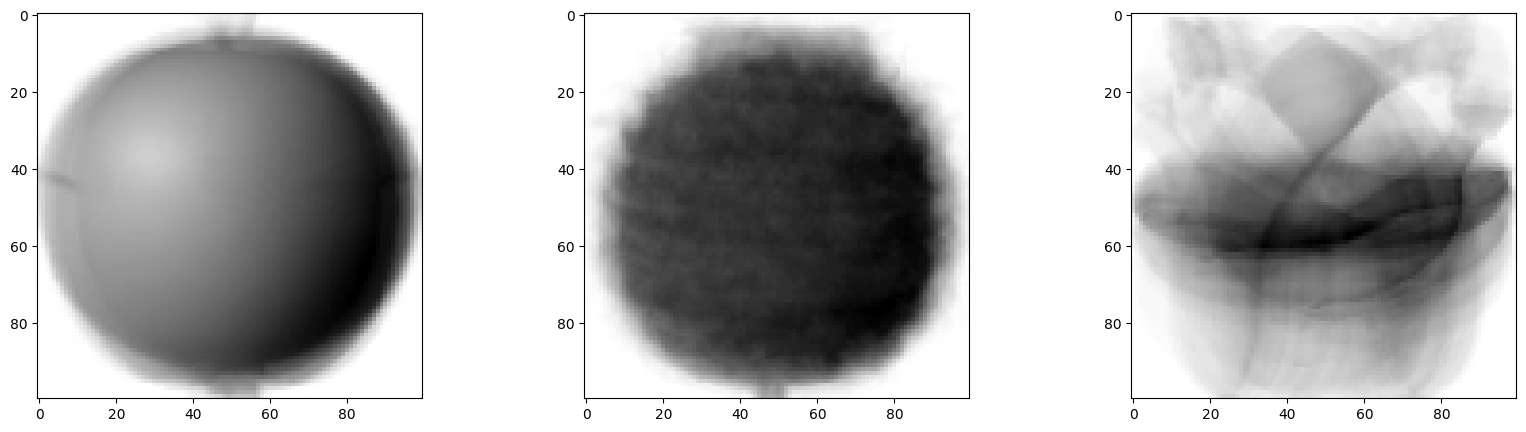

In [ ]:
## 100*100 크기의 데이터의 픽셀 평균값 그림

apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')

plt.show()

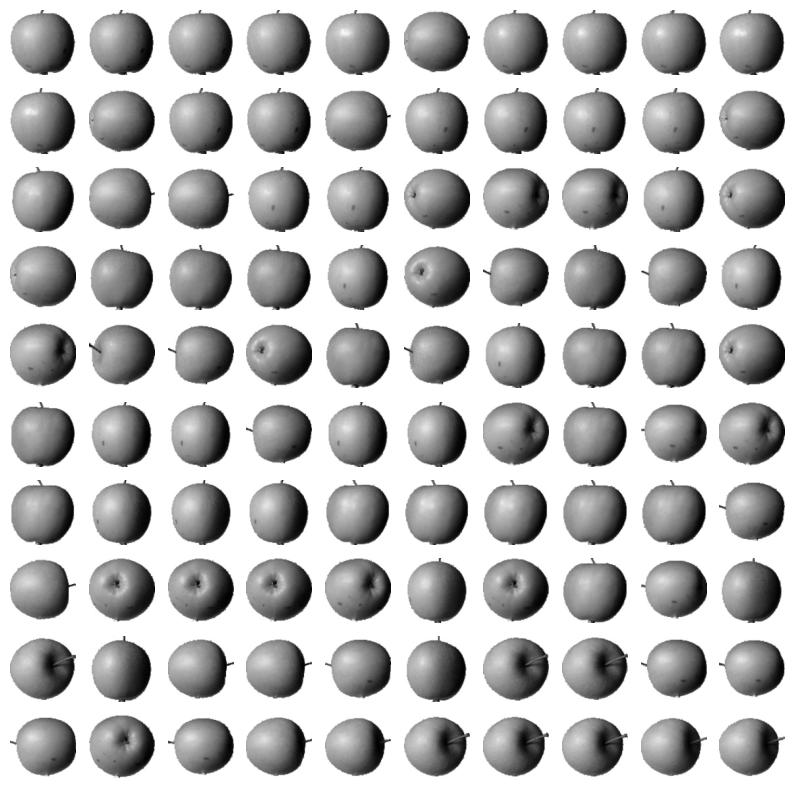

In [ ]:
### 픽셀 평균값과 가까운 사진 고르기

# abs() 함수: 절댓값을 반환한다
# argsort() 함수: 오름차순으로 값의 인덱스를 반환한다

abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
    axs[i, j].axis('off')

plt.show()

# k-평균 알고리즘

클러스터 중심(센트로이드)을 이동하며 최적의 클러스터를 구성하는 알고리즘이다. 비지도 학습이므로 fit() 메서드에는 입력 데이터만 전달한다.

1.   무작위로 k개의 클러스터 중심을 정한다.
2.   각 샘플을 가까운 클러스터로 배정한다.
3.   클러스터의 중심을 각 클러스터의 평균값으로 이동한다.
4.   클러스터 중심에 변화가 없을 때까지 반복한다.


---

과일 사진을 과일 종류대로 모으는 k-평균 알고리즘을 구해보자



In [ ]:
## KMeans 클래스: k-평균 알고리즘을 구현하는 클래스
# n-clusters 매개변수: 클러스터 개수를 지정한다 (하이퍼파라미터)
# max_iter 매개변수: 최대 반복 횟수
# labels_ 속성: 각 샘플이 어떤 레이블에 해당하는지 저장한다

from sklearn.cluster import KMeans

fruits_2d = fruits.reshape(300, 100*100)
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


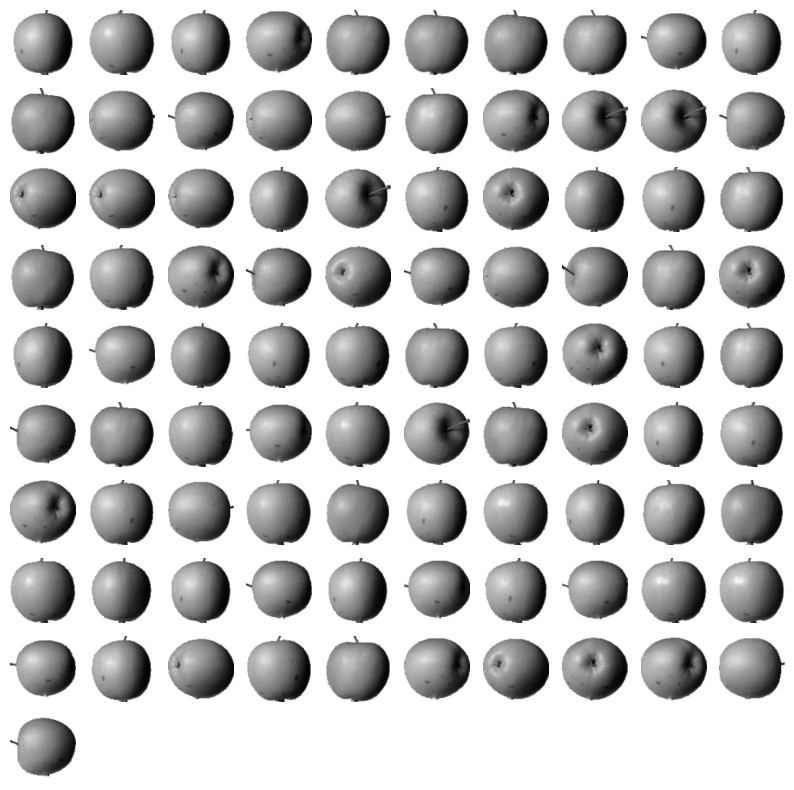

In [ ]:
# 3차원 배열을 전달하면 그림으로 나타내는 함수

import matplotlib.pyplot as plt

def draw_fruits(arr):
  n = len(arr)
  rows = int(np.ceil(n/10))
  if rows < 2:
    cols = n
  else:
    cols = 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols, rows), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j < n:
        axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

draw_fruits(fruits[km.labels_==0])

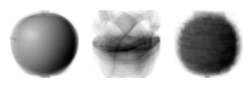

In [ ]:
# cluster_centers_ 속성: 최종 클러스터 중심을 저장한다

draw_fruits(km.cluster_centers_.reshape(-1, 100, 100))

[[5267.70439881 8837.37750892 3393.8136117 ]]
[2]


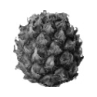

In [ ]:
# transform(입력 데이터) 메서드: 훈련 데이터 샘플에서 클러스터 중심까지의 거리로 변환해준다
# transform(2차원 배열) -> (샘플 개수, 클러스터 개수)의 2차원 배열을 반환한다
# predict(입력 데이터) 메서드: 가장 가까운 클러스터 중심을 예측 클래스로 반환한다

print(km.transform(fruits_2d[100:101]))
print(km.predict(fruits_2d[100:101]))
draw_fruits(fruits[100:101])

# 엘보우 방법

최적의 클러스터 개수(n_clusters 매개변수)를 찾기 위한 방법이다. 클러스터 개수에 따른 이너셔의 변화를 관찰하며 꺾이는 지점을 찾는다.

클러스터 개수↑ 이너셔↓

*   이너셔: 각 클러스터 샘플과 클러스터 중심 사이의 거리의 제곱 합이다. 클러스터 샘플들이 얼마나 모여 있는지를 나타낸다.




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

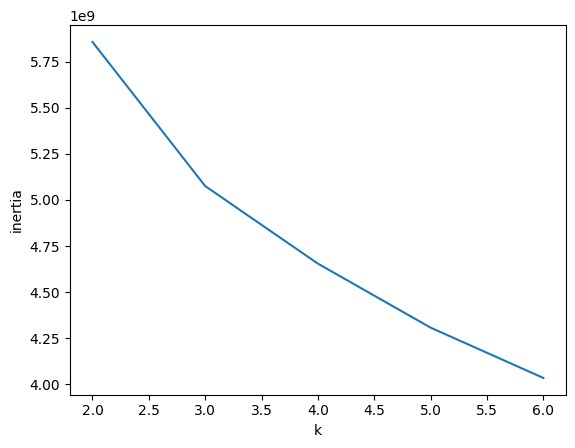

In [ ]:
# inertia_ 속성: 이너셔 값을 저장한다

intertia = []

for k in range(2,7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  intertia.append(km.inertia_)

plt.plot(range(2,7), intertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

#최적의 k값 -> 3

# 차원 축소

차원 축소는 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습이다. 저장 공간을 줄이고 시각화를 용이하게 한다.

# 주성분 분석(PCA)

주성분 분석은 차원 축소 알고리즘의 하나이다. 데이터에서 분산이 큰 방향인 주성분을 찾는다. 원본 데이터를 주성분에 투영하여 새로운 특성을 만든다.


*   주성분: 주성분 벡터는 원본 데이터의 어떤 방향이다. 주성분 벡터의 원소 개수는 원본 데이터의 특성 개수와 같다. 주성분은 원본 데이터와 차원이 같지만 주성분으로 바꾼 데이터가 차원이 줄어드는 것이다.
*   분산: 데이터가 널리 퍼져있는 정도이다. 분산이 큰 방향이란 데이터를 잘 표현하는 벡터다.
*   설명된 분산: 주성분 분석에서 주성분이 원본 데이터의 분산을 설명하는 정도



(50, 10000)


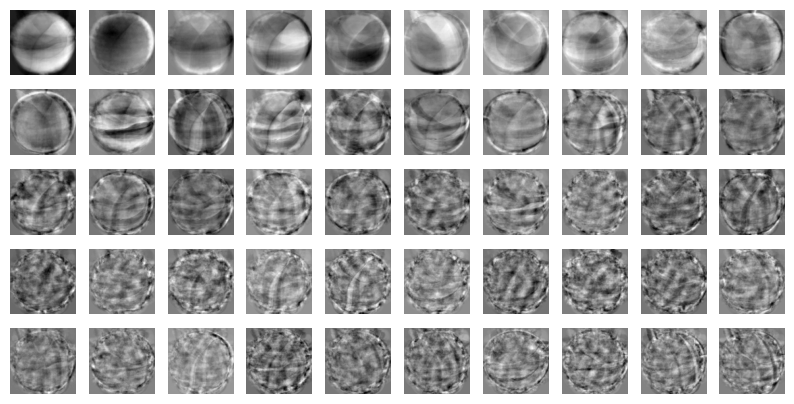

In [ ]:
## PCA 클래스: 주성분 분석 알고리즘을 제공하는 클래스
# n_components 매개변수: 정수 -> 주성분의 개수를 지정한다, 0~1의 비율 -> 설명된 분산의 비율을 지정한다
# components_ 속성: 주성분을 저장한다

from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

print(pca.components_.shape)
draw_fruits(pca.components_.reshape(50,100,100))

(300, 50)
(300, 10000)


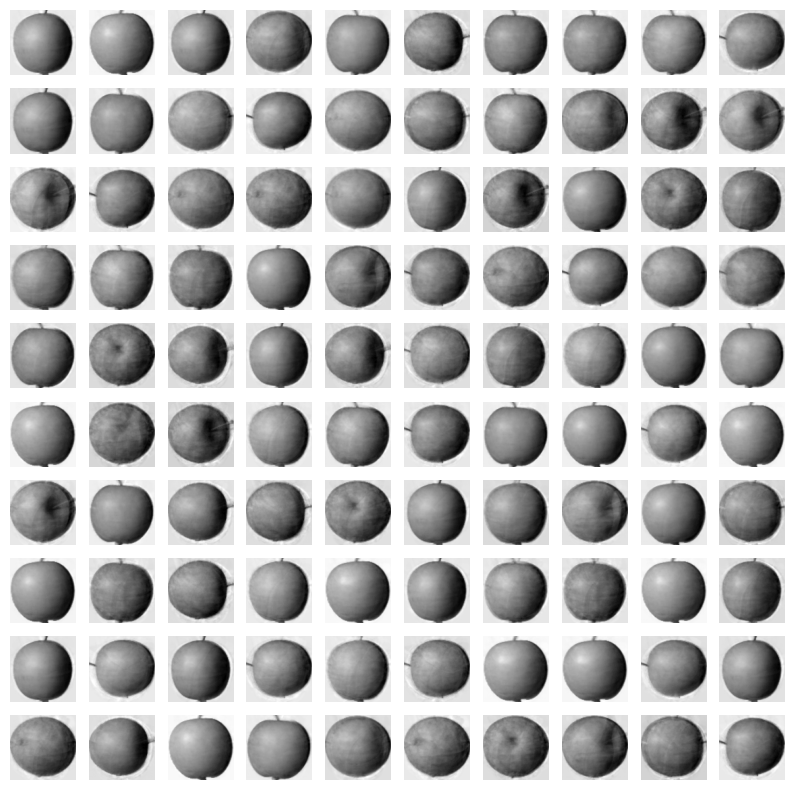

In [ ]:
# transform() 메서드: 원본 데이터를 주성분에 투영하여 새로운 특성을 만든다
# inverse_transform 메서드: 새로운 특성을 원본 데이터로 재구성한다

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

fruits_reconstruct = fruits_inverse.reshape(300,100,100)
draw_fruits(fruits_reconstruct[0:100])



0.921535617939703


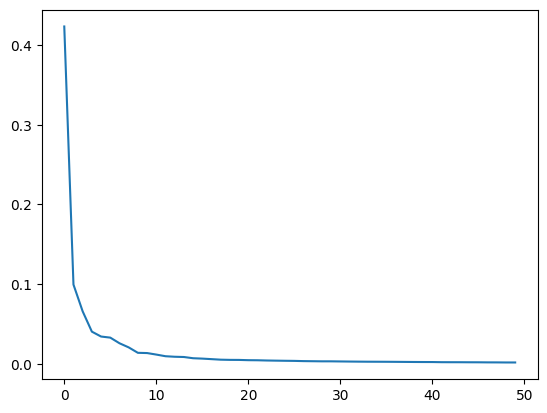

In [ ]:
# explained_variance_ratio_ 속성: 각 주성분의 분산 비율을 저장한다

print(np.sum(pca.explained_variance_ratio_))

plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
## 설명된 분산이 50%인 경우 (주성분의 개수가 2개인 경우)

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
fruits_pca = pca.transform(fruits_2d)

print(len(pca.components_))

2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


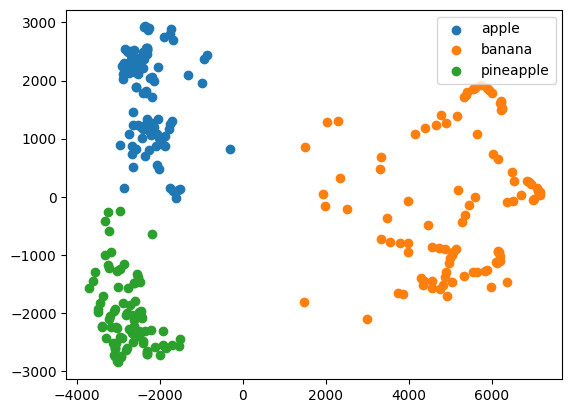

In [ ]:
## 데이터 시각화

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

labels = ['apple', 'banana', 'pineapple']
for n in range(3):
  data = fruits_pca[km.labels_==n]
  plt.scatter(data[:,0], data[:,1], label = labels[n])

plt.legend()
plt.show()
